In [40]:
import pandas as pd

df = pd.read_csv('./../DNN-EdgeIIoT-dataset.csv')

print(f"Dataset loaded: {df.shape}")


C:\Users\DELL\AppData\Local\Temp\ipykernel_14548\4069167745.py:3: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./../DNN-EdgeIIoT-dataset.csv')


Dataset loaded: (2219201, 63)


In [41]:
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [42]:
df.shape

(2219201, 63)

In [43]:
df.info

<bound method DataFrame.info of                         frame.time     ip.src_host    ip.dst_host  \
0         2021 11:44:10.081753000    192.168.0.128  192.168.0.101   
1         2021 11:44:10.162218000    192.168.0.101  192.168.0.128   
2         2021 11:44:10.162271000    192.168.0.128  192.168.0.101   
3         2021 11:44:10.162641000    192.168.0.128  192.168.0.101   
4         2021 11:44:10.166132000    192.168.0.101  192.168.0.128   
...                            ...             ...            ...   
2219196   2021 23:24:32.816050000   166.75.162.225  192.168.0.128   
2219197   2021 23:24:32.816595000    70.162.34.183  192.168.0.128   
2219198   2021 23:24:32.818043000     40.13.95.244  192.168.0.128   
2219199   2021 23:24:32.820831000    18.132.75.125  192.168.0.128   
2219200   2021 23:24:32.823654000    82.173.42.163  192.168.0.128   

        arp.dst.proto_ipv4  arp.opcode  arp.hw.size arp.src.proto_ipv4  \
0                        0         0.0          0.0              

## Feature Encoding

In [44]:

# 2) Feature Encoding
# The labels are already in the dataset
print("Dataset columns:")
print(df.columns.tolist())

# The last column should be the label column
print("\nLabel column name:", df.columns[-1])
print("Label distribution:")
print(df.iloc[:, -1].value_counts())

# Use cleaned dataframe directly
df_with_labels = df.copy()
print("\nDataset with labels shape:", df_with_labels.shape)



Dataset columns:
['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.file_data', 'http.content_length', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msg', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.pr

In [45]:

from sklearn.preprocessing import LabelEncoder

# Separate features and labels
X = df_with_labels.iloc[:, :-1]
y = df_with_labels.iloc[:, -1]

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Encode categorical features and convert all to numeric
le_dict = {}  # dictionary to store encoders for each column

for col in X.columns:
    # Check if column has object/string dtype
    if X[col].dtype == 'object':
        # Convert to string to avoid mixed-type issues
        X[col] = X[col].astype(str)
        
        # Apply LabelEncoder
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        le_dict[col] = le
        
        print(f"✓ Encoded column: {col} (unique values: {len(le.classes_)})")
    else:
        # Ensure numeric columns are float
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce')
        except:
            # If conversion fails, use label encoding
            X[col] = X[col].astype(str)
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            le_dict[col] = le
            print(f"✓ Encoded column (numeric->string): {col}")

# Handle any remaining NaN values from failed conversions
print(f"\nMissing values after encoding:")
print(X.isnull().sum().sum())
X = X.fillna(0)

# Verify all columns are numeric
print(f"\nFinal feature dtypes:")
print(X.dtypes)

print("\nFeatures after encoding:")
print(X.head())

print(f"\nTotal encoded features: {X.shape[1]}")



Features shape: (2219201, 62)
Labels shape: (2219201,)
✓ Encoded column: frame.time (unique values: 2206364)
✓ Encoded column: frame.time (unique values: 2206364)
✓ Encoded column: ip.src_host (unique values: 137167)
✓ Encoded column: ip.src_host (unique values: 137167)
✓ Encoded column: ip.dst_host (unique values: 52425)
✓ Encoded column: ip.dst_host (unique values: 52425)
✓ Encoded column: arp.dst.proto_ipv4 (unique values: 9)
✓ Encoded column: arp.dst.proto_ipv4 (unique values: 9)
✓ Encoded column: arp.src.proto_ipv4 (unique values: 10)
✓ Encoded column: arp.src.proto_ipv4 (unique values: 10)
✓ Encoded column: http.file_data (unique values: 2396)
✓ Encoded column: http.file_data (unique values: 2396)
✓ Encoded column: http.request.uri.query (unique values: 5526)
✓ Encoded column: http.request.uri.query (unique values: 5526)
✓ Encoded column: http.request.method (unique values: 9)
✓ Encoded column: http.request.method (unique values: 9)
✓ Encoded column: http.referer (unique values: 

In [46]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# FEATURE REMOVAL LISTS (Based on Paper)
# ============================================

# TABLE 5: Features removed during initial preprocessing
INITIAL_REMOVAL_FEATURES = [
    'frame.time',
    'ip.src_host',
    'ip.dst_host',
    'arp.src.proto_ipv4',
    'arp.dst.proto_ipv4',
    'http.request.full_uri',
    'icmp.transmit_timestamp',
    'http.file_data',
    'http.request.uri.query',
    'tcp.options',
    'tcp.payload',
    'tcp.srcport',
    'tcp.dstport',
    'udp.port',
    'mqtt.msg'
]


def encode_all_features(X_df):
    """
    Encode all categorical features to numeric
    """
    X_encoded = X_df.copy()
    encoder_dict = {}
    
    for col in X_encoded.columns:
        if X_encoded[col].dtype == 'object':
            # Convert to string first
            X_encoded[col] = X_encoded[col].astype(str)
            
            # Apply LabelEncoder
            le = LabelEncoder()
            X_encoded[col] = le.fit_transform(X_encoded[col])
            encoder_dict[col] = le
        else:
            # Convert to numeric, fill NaN with 0
            X_encoded[col] = pd.to_numeric(X_encoded[col], errors='coerce').fillna(0)
    
    return X_encoded, encoder_dict

# ============================================
# STAGE 1: INITIAL PREPROCESSING
# ============================================

def stage1_initial_removal(df, target_col='Attack_type'):
    """
    Stage 1: Remove protocol-specific fields, timestamps, and irrelevant attributes
    as documented in Table 5
    """
    print("="*70)
    print("STAGE 1: INITIAL FEATURE REMOVAL")
    print("="*70)
    
    # Get initial feature count
    initial_features = df.shape[1]
    print(f"Initial number of features: {initial_features}")
    
    # Identify which features to remove that exist in the dataset
    features_to_remove = [f for f in INITIAL_REMOVAL_FEATURES if f in df.columns]
    
    print(f"\nFeatures to remove (from Table 5): {len(features_to_remove)}")
    if features_to_remove:
        print("Removing:")
        for feature in features_to_remove:
            print(f"  - {feature}")

    # Remove features
    df_stage1 = df.drop(columns=features_to_remove, errors='ignore')
    
    # Remove target column temporarily for feature processing
    if target_col in df_stage1.columns:
        y = df_stage1[target_col]
        X = df_stage1.drop(columns=[target_col])
    else:
        raise ValueError(f"Target column '{target_col}' not found in dataset")
    
    remaining_features = X.shape[1]
    removed_count = initial_features - remaining_features - 1  # -1 for target
    
    print(f"\nFeatures after Stage 1: {remaining_features}")
    print(f"Features removed: {removed_count}")
    
    # Encode all features to numeric
    print("\nEncoding all remaining features to numeric...")
    X, encoder_dict = encode_all_features(X)
    print(f"✓ All {X.shape[1]} features encoded successfully")
    
    print("="*70)
    
    return X, y


# ============================================
# STAGE 2: MUTUAL INFORMATION FEATURE SELECTION
# ============================================

def stage2_mi_feature_selection(X, y, mi_threshold=0.1, sample_size=100000):
   
    print("\n" + "="*70)
    print("STAGE 2: MUTUAL INFORMATION FEATURE SELECTION")
    print("="*70)
    
    # Ensure all values are numeric
    print("\nEnsuring all features are numeric...")
    X_numeric = X.copy()
    for col in X_numeric.columns:
        X_numeric[col] = pd.to_numeric(X_numeric[col], errors='coerce').fillna(0)
    
    # Encode target if it's categorical
    if y.dtype == 'object':
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
        print(f"Target classes: {len(le.classes_)}")
        print(f"Class distribution:\n{pd.Series(y).value_counts()}")
    else:
        y_encoded = y
        le = None
    
    # Sample data if too large (for computational efficiency)
    if X_numeric.shape[0] > sample_size:
        print(f"\nSampling {sample_size} instances for MI computation...")
        sample_idx = np.random.choice(X_numeric.shape[0], sample_size, replace=False)
        X_sample = X_numeric.iloc[sample_idx]
        y_sample = y_encoded[sample_idx]
    else:
        X_sample = X_numeric
        y_sample = y_encoded
    
    # Compute Mutual Information scores
    print(f"\nComputing MI scores for {X_sample.shape[1]} features...")
    print("(This may take a few minutes...)")
    
    mi_scores = mutual_info_classif(X_sample, y_sample, random_state=42, n_jobs=-1)
    
    # Create MI scores dataframe
    mi_df = pd.DataFrame({
        'Feature': X.columns,
        'MI_Score': mi_scores
    }).sort_values('MI_Score', ascending=False)
    
    # Display MI score statistics
    print(f"\nMI Score Statistics:")
    print(f"  Mean: {mi_scores.mean():.4f}")
    print(f"  Median: {np.median(mi_scores):.4f}")
    print(f"  Min: {mi_scores.min():.4f}")
    print(f"  Max: {mi_scores.max():.4f}")
    
    # Identify features to remove (MI < threshold)
    low_mi_features = mi_df[mi_df['MI_Score'] < mi_threshold]['Feature'].tolist()
    high_mi_features = mi_df[mi_df['MI_Score'] >= mi_threshold]['Feature'].tolist()
    
    print(f"\nFeatures with MI score < {mi_threshold}: {len(low_mi_features)}")
    print(f"Features with MI score >= {mi_threshold}: {len(high_mi_features)}")
    
    # Show features to be removed
    print(f"\nRemoving {len(low_mi_features)} features with MI < {mi_threshold}:")
    for feature in low_mi_features[:10]:  # Show first 10
        score = mi_df[mi_df['Feature'] == feature]['MI_Score'].values[0]
        print(f"  - {feature:35s} (MI: {score:.4f})")
    if len(low_mi_features) > 10:
        print(f"  ... and {len(low_mi_features) - 10} more")
    
    # Remove low MI features
    X_final = X_numeric[high_mi_features]
    
    print(f"\nFinal feature count: {X_final.shape[1]}")
    print("="*70)
    
    return X_final, y, mi_df, le

# ============================================
# COMPLETE PREPROCESSING PIPELINE
# ============================================

def complete_preprocessing_pipeline(df, target_col='Attack_type', 
                                   use_mi_computation=True,
                                   mi_threshold=0.1,
                                   sample_size=100000):
    """
    Complete two-stage preprocessing pipeline following the paper methodology
    """
    
    print("\n" + "="*70)
    print("PREPROCESSING PIPELINE")
    print("="*70)
    print(f"\nOriginal dataset shape: {df.shape}")
    print(f"Target column: {target_col}")
    
    # Stage 1: Initial removal
    X_stage1, y = stage1_initial_removal(df, target_col)
    
    # Stage 2: MI-based feature selection
    if use_mi_computation:
        X_final, y, mi_df, label_encoder = stage2_mi_feature_selection(
            X_stage1, y, mi_threshold, sample_size
        )
    else:
        X_final, y = stage2_remove_table6_features(X_stage1, y)
        mi_df = None
        label_encoder = None
    
    # Summary
    print("\n" + "="*70)
    print("PREPROCESSING COMPLETE - SUMMARY")
    print("="*70)
    print(f"Original features: {df.shape[1] - 1}")
    print(f"After Stage 1 (Initial Removal): {X_stage1.shape[1]}")
    print(f"After Stage 2 (MI Selection): {X_final.shape[1]}")
    print(f"Total features removed: {df.shape[1] - 1 - X_final.shape[1]}")
    print(f"\nFinal dataset shape: {X_final.shape}")
    print(f"Target distribution:\n{pd.Series(y).value_counts()}")
    
    # List final features
    print(f"\n{'='*70}")
    print("FINAL SELECTED FEATURES:")
    print("="*70)
    for i, feature in enumerate(X_final.columns, 1):
        print(f"{i:2d}. {feature}")
    
    return X_final, y, mi_df, label_encoder

# ============================================
# SAVE RESULTS
# ============================================

def save_preprocessing_results(X_final, y, mi_df=None, output_prefix='edge_iiot'):
    """Save preprocessing results to files"""
    
    # Save final dataset
    final_df = X_final.copy()
    final_df['Attack_type'] = y
    final_df.to_csv(f'{output_prefix}_preprocessed.csv', index=False)
    print(f"\nPreprocessed dataset saved to '{output_prefix}_preprocessed.csv'")
    
    # Save feature list
    with open(f'{output_prefix}_selected_features.txt', 'w') as f:
        f.write("Selected Features After Two-Stage Preprocessing\n")
        f.write("="*60 + "\n\n")
        for i, feature in enumerate(X_final.columns, 1):
            f.write(f"{i:2d}. {feature}\n")
    print(f"Feature list saved to '{output_prefix}_selected_features.txt'")
    
    # Save MI scores if available
    if mi_df is not None:
        mi_df.to_csv(f'{output_prefix}_mi_scores.csv', index=False)
        print(f"MI scores saved to '{output_prefix}_mi_scores.csv'")
    
    print("\nAll results saved successfully!")



In [47]:

import pandas as pd
import numpy as np

print("Executing Paper-Based Preprocessing Pipeline...")
print("="*70)

X_final, y, mi_df, encoder = complete_preprocessing_pipeline(
    df, 
    target_col=df.columns[-1],  # Use the last column as target
    use_mi_computation=True,  # Compute MI scores
    mi_threshold=0.1,
    sample_size=100000
)

# Save results
save_preprocessing_results(X_final, y, mi_df, output_prefix='./../edge_iiot')

print(f"\nFinal selected features: {X_final.shape[1]}")



Executing Paper-Based Preprocessing Pipeline...

PREPROCESSING PIPELINE

Original dataset shape: (2219201, 63)
Target column: Attack_type
STAGE 1: INITIAL FEATURE REMOVAL
Initial number of features: 63

Features to remove (from Table 5): 15
Removing:
  - frame.time
  - ip.src_host
  - ip.dst_host
  - arp.src.proto_ipv4
  - arp.dst.proto_ipv4
  - http.request.full_uri
  - icmp.transmit_timestamp
  - http.file_data
  - http.request.uri.query
  - tcp.options
  - tcp.payload
  - tcp.srcport
  - tcp.dstport
  - udp.port
  - mqtt.msg

Features after Stage 1: 47
Features removed: 15

Encoding all remaining features to numeric...

Features after Stage 1: 47
Features removed: 15

Encoding all remaining features to numeric...
✓ All 47 features encoded successfully

STAGE 2: MUTUAL INFORMATION FEATURE SELECTION

Ensuring all features are numeric...
✓ All 47 features encoded successfully

STAGE 2: MUTUAL INFORMATION FEATURE SELECTION

Ensuring all features are numeric...
Target classes: 15
Class d

In [50]:
# Install imbalanced-learn if needed
try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn"])
    from imblearn.over_sampling import SMOTE

print("\n4) Data Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)")
print("=" * 60)

# Check current class distribution
print("\nClass distribution before SMOTE:")
print(y.value_counts())
class_counts = y.value_counts().values
print(f"Majority class: {class_counts[0]} samples")
print(f"Minority class: {class_counts[-1]} samples")

# For memory efficiency with multi-class imbalanced data,
# use SMOTE with a sampling_strategy that targets 30% of majority class
# This avoids attempting to reach perfect 50:50 which causes OOM

majority_count = y.value_counts().max()
target_ratio = 0.3  # Oversample minorities to 30% of majority class

sampling_strategy = {cls: int(majority_count * target_ratio) 
                     for cls in y.unique() 
                     if y.value_counts()[cls] < int(majority_count * target_ratio)}

print(f"\nApplying SMOTE with target ratio: {target_ratio} (of majority class)")
print(f"Minority classes will be oversampled to: {list(sampling_strategy.values())[0] if sampling_strategy else 'no change'} samples")

# Apply SMOTE with memory-efficient sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X_final, y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_smote).value_counts().sort_values(ascending=False))

print(f"\nDataset shape after SMOTE: {X_smote.shape}")
print(f"Labels shape after SMOTE: {len(y_smote)}")
print(f"Total rows increase: {len(y_smote)} / {len(y)} = {len(y_smote)/len(y):.2f}x")

# Convert back to DataFrame to maintain column names
X_smote = pd.DataFrame(X_smote, columns=X_final.columns)
y_smote = pd.Series(y_smote, name='label')



4) Data Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)

Class distribution before SMOTE:
Attack_type
Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: count, dtype: int64
Majority class: 1615643 samples
Minority class: 1001 samples

Applying SMOTE with target ratio: 0.3 (of majority class)
Minority classes will be oversampled to: 484692 samples

Applying SMOTE with target ratio: 0.3 (of majority class)
Minority classes will be oversampled to: 484692 samples

Class distribution after SMOTE:
Attack_type
Normal            

C:\Users\DELL\AppData\Local\Temp\ipykernel_14548\805464762.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_before.index, y=y_before.values, palette='Set2', ax=axes[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_14548\805464762.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_after.index, y=y_after.values, palette='Set1', ax=axes[1])
C:\Users\DELL\AppData\Local\Temp\ipykernel_14548\805464762.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_after.index, y=y_after.values, palette='Set1', ax=axes[1])


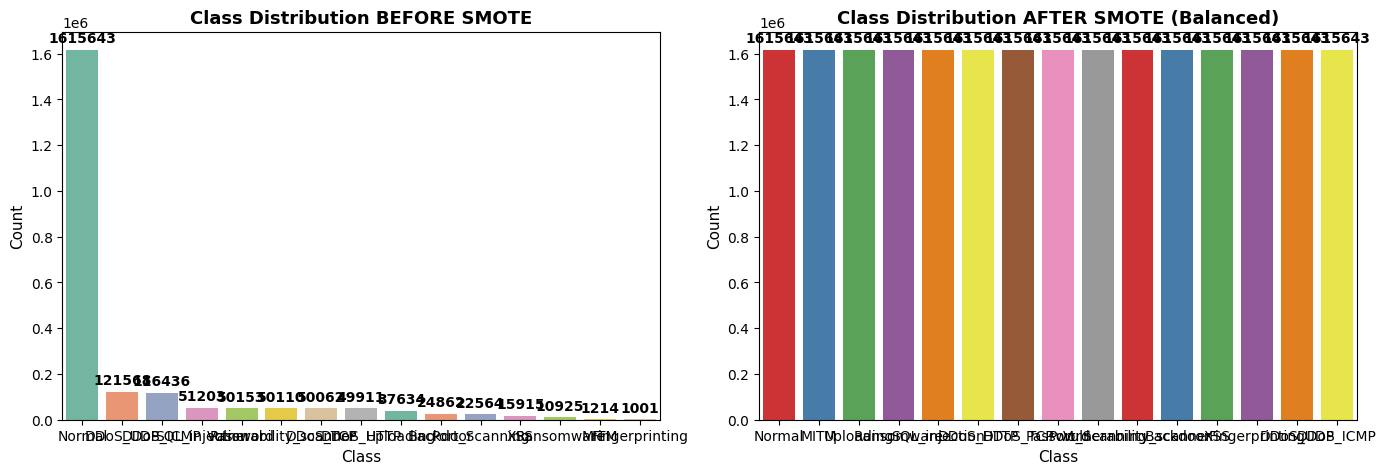

✓ Class distribution plot saved to 'class_distribution_smote.png'


In [ ]:

# Visualize class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before SMOTE
y_before = y.value_counts()
sns.barplot(x=y_before.index, y=y_before.values, palette='Set2', ax=axes[0])
axes[0].set_title('Class Distribution BEFORE SMOTE', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_xlabel('Class', fontsize=11)
for i, v in enumerate(y_before.values):
    axes[0].text(i, v + max(y_before.values)*0.02, str(v), ha='center', fontweight='bold')

# After SMOTE
y_after = pd.Series(y_smote).value_counts()
sns.barplot(x=y_after.index, y=y_after.values, palette='Set1', ax=axes[1])
axes[1].set_title('Class Distribution AFTER SMOTE (Balanced)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_xlabel('Class', fontsize=11)
for i, v in enumerate(y_after.values):
    axes[1].text(i, v + max(y_after.values)*0.02, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('./../class_distribution_smote.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Class distribution plot saved to 'class_distribution_smote.png'")



In [ ]:

from sklearn.preprocessing import StandardScaler
import gc

print("\n5) Feature Normalization using StandardScaler")
print("=" * 60)

# Normalize features to have mean=0 and std=1
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_smote)
X_normalized = pd.DataFrame(X_normalized, columns=X_smote.columns)

print(f"\n✓ Normalization complete!")
print(f"  Dataset shape: {X_normalized.shape}")
print(f"  Memory usage: {X_normalized.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  Mean (should be ~0): {X_normalized.values.mean():.6f}")
print(f"  Std (should be ~1): {X_normalized.values.std():.6f}")
print(f"  Min value: {X_normalized.values.min():.4f}")
print(f"  Max value: {X_normalized.values.max():.4f}")

# Delete X_smote to free memory before splitting
del X_smote
gc.collect()




5) Feature Normalization using StandardScaler

✓ Normalization complete!
  Dataset shape: (24234645, 18)
  Memory usage: 3328.12 MB

✓ Normalization complete!
  Dataset shape: (24234645, 18)
  Memory usage: 3328.12 MB
  Mean (should be ~0): 0.000000
  Mean (should be ~0): 0.000000
  Std (should be ~1): 1.000000
  Std (should be ~1): 1.000000
  Min value: -5.0685
  Min value: -5.0685
  Max value: 385.7903
  Max value: 385.7903


1453

In [ ]:

from sklearn.model_selection import train_test_split
import pickle
import gc

print("\n6) Data Splitting (Train-Validation-Test)")
print("=" * 60)

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_normalized, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)

# Second split: 75% train (of temp), 25% val (of temp) = 60% train, 20% val overall
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Clean up memory
del X_temp, y_temp, X_normalized
gc.collect()

print(f"Original balanced dataset size: {len(y_smote)}")
print(f"\nTrain set size: {len(X_train)} ({len(X_train)/len(y_smote)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(y_smote)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(y_smote)*100:.1f}%)")

print(f"\nTrain set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation set - Features: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test set - Features: {X_test.shape}, Labels: {y_test.shape}")

print(f"\nClass distribution in Train set:")
print(pd.Series(y_train).value_counts())

print(f"\nClass distribution in Validation set:")
print(pd.Series(y_val).value_counts())

print(f"\nClass distribution in Test set:")
print(pd.Series(y_test).value_counts())

# Save preprocessed data for model training
print("\n" + "=" * 60)
print("Saving preprocessed datasets...")

# Save as numpy arrays and pickle for easy loading
preprocessed_data = {
    'X_train': X_train.values,
    'X_val': X_val.values,
    'X_test': X_test.values,
    'y_train': y_train.values,
    'y_val': y_val.values,
    'y_test': y_test.values,
    'feature_names': X_train.columns.tolist(),
    'scaler': scaler,
    'X_final_shape': X_final.shape
}

with open('./../preprocessed_data.pkl', 'wb') as f:
    pickle.dump(preprocessed_data, f)

print("✓ Preprocessed data saved to 'preprocessed_data.pkl'")

# Save as CSV in chunks to avoid memory issues
print("\nSaving train/val/test sets to CSV...")
X_train.to_csv('./../X_train.csv', index=False)
X_val.to_csv('./../X_val.csv', index=False)
X_test.to_csv('./../X_test.csv', index=False)
pd.Series(y_train).to_csv('./../y_train.csv', index=False, header=['label'])
pd.Series(y_val).to_csv('./../y_val.csv', index=False, header=['label'])
pd.Series(y_test).to_csv('./../y_test.csv', index=False, header=['label'])

print("✓ Train/Val/Test sets saved as CSV files")

# Save feature names for reference
with open('./../feature_names.txt', 'w') as f:
    for i, name in enumerate(X_train.columns, 1):
        f.write(f"{i:2d}. {name}\n")

print("✓ Feature names saved to 'feature_names.txt'")

# Clean up
del X_train, X_val, X_test, y_train, y_val, y_test, X_smote, y_smote
gc.collect()

print("\n" + "="*60)
print("PREPROCESSING COMPLETE!")
print("="*60)
print(f"✓ Final features selected: {X_final.shape[1]}")
print(f"✓ Total samples after SMOTE: {len(y_smote)}")
print(f"  - Training samples: ~60%")
print(f"  - Validation samples: ~20%")
print(f"  - Test samples: ~20%")
print(f"\nReady for LSTM-CNN Hybrid Model Training!")
print("\nData saved in:")
print("  - preprocessed_data.pkl (Python pickle)")
print("  - X_train.csv, X_val.csv, X_test.csv")
print("  - y_train.csv, y_val.csv, y_test.csv")
print("  - feature_names.txt (list of selected features)")




6) Data Splitting (Train-Validation-Test)
Original balanced dataset size: 24234645

Train set size: 14540787 (60.0%)
Validation set size: 4846929 (20.0%)
Test set size: 4846929 (20.0%)

Train set - Features: (14540787, 18), Labels: (14540787,)
Validation set - Features: (4846929, 18), Labels: (4846929,)
Test set - Features: (4846929, 18), Labels: (4846929,)

Class distribution in Train set:
Original balanced dataset size: 24234645

Train set size: 14540787 (60.0%)
Validation set size: 4846929 (20.0%)
Test set size: 4846929 (20.0%)

Train set - Features: (14540787, 18), Labels: (14540787,)
Validation set - Features: (4846929, 18), Labels: (4846929,)
Test set - Features: (4846929, 18), Labels: (4846929,)

Class distribution in Train set:
label
Normal                   969386
DDoS_HTTP                969386
Password                 969386
Backdoor                 969386
XSS                      969386
Vulnerability_scanner    969386
Uploading                969386
DDoS_ICMP              

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

print("Creating data split visualization...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

try:
    # If variables still in memory
    splits = ['Train', 'Validation', 'Test']
    sizes = [len(y_train), len(y_val), len(y_test)]
    colors = ['#3498db', '#2ecc71', '#e74c3c']
    
    # Pie chart
    axes[0, 0].pie(sizes, labels=splits, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[0, 0].set_title('Data Split Distribution', fontsize=13, fontweight='bold')
    
    # Bar chart
    axes[0, 1].bar(splits, sizes, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    axes[0, 1].set_title('Number of Samples in Each Split', fontsize=13, fontweight='bold')
    axes[0, 1].set_ylabel('Number of Samples', fontsize=11)
    for i, v in enumerate(sizes):
        axes[0, 1].text(i, v + max(sizes)*0.02, f'{v:,}', ha='center', fontweight='bold')
    
    # Class distribution in each split
    train_dist = pd.Series(y_train).value_counts().sort_index()
    val_dist = pd.Series(y_val).value_counts().sort_index()
    test_dist = pd.Series(y_test).value_counts().sort_index()
    
    x = np.arange(len(train_dist))
    width = 0.25
    
    axes[1, 0].bar(x - width, train_dist.values, width, label='Train', color='#3498db', alpha=0.8)
    axes[1, 0].bar(x, val_dist.values, width, label='Validation', color='#2ecc71', alpha=0.8)
    axes[1, 0].bar(x + width, test_dist.values, width, label='Test', color='#e74c3c', alpha=0.8)
    axes[1, 0].set_title('Class Distribution Across Splits', fontsize=13, fontweight='bold')
    axes[1, 0].set_ylabel('Count', fontsize=11)
    axes[1, 0].set_xlabel('Class', fontsize=11)
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels([str(i) for i in train_dist.index])
    axes[1, 0].legend()
    
    # Feature count by split
    feature_info = {
        'Train Features': X_train.shape[1],
        'Validation Features': X_val.shape[1],
        'Test Features': X_test.shape[1]
    }
    axes[1, 1].barh(list(feature_info.keys()), list(feature_info.values()), 
                    color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=2)
    axes[1, 1].set_title('Number of Features in Each Split', fontsize=13, fontweight='bold')
    axes[1, 1].set_xlabel('Number of Features', fontsize=11)
    for i, v in enumerate(feature_info.values()):
        axes[1, 1].text(v + 0.2, i, str(v), va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('./../data_split_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Data split visualization saved to 'data_split_visualization.png'")

except NameError as e:
    print("Note: Variables cleaned up from memory. Recreating from saved files...")
    
    # Load from CSV
    X_train_loaded = pd.read_csv('./../X_train.csv')
    y_train_loaded = pd.read_csv('./../y_train.csv')
    X_val_loaded = pd.read_csv('./../X_val.csv')
    y_val_loaded = pd.read_csv('./../y_val.csv')
    X_test_loaded = pd.read_csv('./../X_test.csv')
    y_test_loaded = pd.read_csv('./../y_test.csv')
    
    splits = ['Train', 'Validation', 'Test']
    sizes = [len(y_train_loaded), len(y_val_loaded), len(y_test_loaded)]
    colors = ['#3498db', '#2ecc71', '#e74c3c']
    
    # Pie chart
    axes[0, 0].pie(sizes, labels=splits, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[0, 0].set_title('Data Split Distribution', fontsize=13, fontweight='bold')
    
    # Bar chart
    axes[0, 1].bar(splits, sizes, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    axes[0, 1].set_title('Number of Samples in Each Split', fontsize=13, fontweight='bold')
    axes[0, 1].set_ylabel('Number of Samples', fontsize=11)
    for i, v in enumerate(sizes):
        axes[0, 1].text(i, v + max(sizes)*0.02, f'{v:,}', ha='center', fontweight='bold')
    
    # Class distribution in each split
    train_dist = y_train_loaded.iloc[:, 0].value_counts().sort_index()
    val_dist = y_val_loaded.iloc[:, 0].value_counts().sort_index()
    test_dist = y_test_loaded.iloc[:, 0].value_counts().sort_index()
    
    x = np.arange(len(train_dist))
    width = 0.25
    
    axes[1, 0].bar(x - width, train_dist.values, width, label='Train', color='#3498db', alpha=0.8)
    axes[1, 0].bar(x, val_dist.values, width, label='Validation', color='#2ecc71', alpha=0.8)
    axes[1, 0].bar(x + width, test_dist.values, width, label='Test', color='#e74c3c', alpha=0.8)
    axes[1, 0].set_title('Class Distribution Across Splits', fontsize=13, fontweight='bold')
    axes[1, 0].set_ylabel('Count', fontsize=11)
    axes[1, 0].set_xlabel('Class', fontsize=11)
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels([str(i) for i in train_dist.index])
    axes[1, 0].legend()
    
    # Feature count by split
    feature_info = {
        'Train Features': X_train_loaded.shape[1],
        'Validation Features': X_val_loaded.shape[1],
        'Test Features': X_test_loaded.shape[1]
    }
    axes[1, 1].barh(list(feature_info.keys()), list(feature_info.values()), 
                    color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=2)
    axes[1, 1].set_title('Number of Features in Each Split', fontsize=13, fontweight='bold')
    axes[1, 1].set_xlabel('Number of Features', fontsize=11)
    for i, v in enumerate(feature_info.values()):
        axes[1, 1].text(v + 0.2, i, str(v), va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('./../data_split_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Data split visualization saved from CSV files")

